# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [8]:
var='Sales'

1) 변수의 비즈니스 의미

>각 지역의 판매액

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [9]:
data[var].isna().sum()

0

>NaN 존재하지 않음

4) 가변수화 필요 여부

>X

5) 기초통계량(수치화)

In [10]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


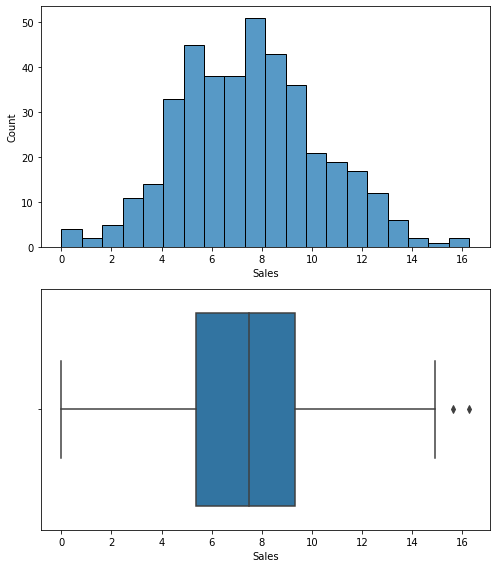

[5.39 0.  ]
[ 9.32 14.9 ]


In [14]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins=20)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 5-10구간이 가장많은 판매량을 차지함

8) 추가 분석해 볼 사항이 있나요?

### ② CompPrice

In [18]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

>경쟁사 가격

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [19]:
data[var].isna().sum()

0

> NaN없음

4) 가변수화 필요 여부

> X

5) 기초통계량(수치화)

In [20]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


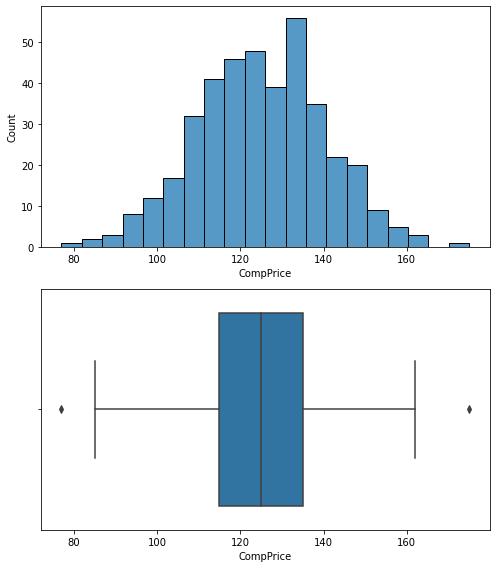

[5.39 0.  ]
[ 9.32 14.9 ]


In [21]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins=20)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분 105~140달러로 구성되있음
* 전체는 77~175달러까지 구성
* 크기나 기능 등 제품 별로 가격이 다양할 것 같음

8) 추가 분석해 볼 사항이 있나요?

* 자사 제품과 가격 비교
* 도심과 지역마다 가겨이 다른가?

### ③ Income

In [25]:
var = 'Income'

1) 변수의 비즈니스 의미

>지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [26]:
data[var].isna().sum()

0

> NAN 없음

4) 가변수화 필요 여부

> X

5) 기초통계량(수치화)

In [27]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


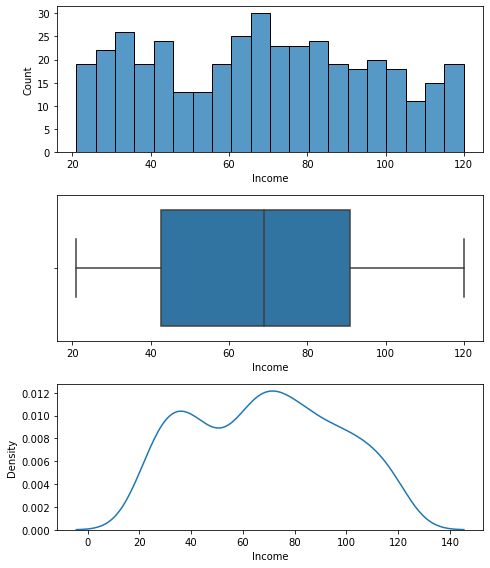

In [29]:
plt.figure(figsize=(7,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins=20)

plt.subplot(3,1,2)
sns.boxplot(data[var])

plt.subplot(3,1,3)
sns.kdeplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 4만달러~9만달러 = 전체의 50%
* 2달러(2395만원)~12만달러(1억4370만원)가 전체 구간 >> 연간소득

8) 추가 분석해 볼 사항이 있나요?

* 소득과 판매량의 상관관계

### ④ Advertising

In [30]:
var='Advertising'

1) 변수의 비즈니스 의미

>각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [31]:
data[var].isna().sum()

0

>NaN없음

4) 가변수화 필요 여부

> X

5) 기초통계량(수치화)

In [32]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


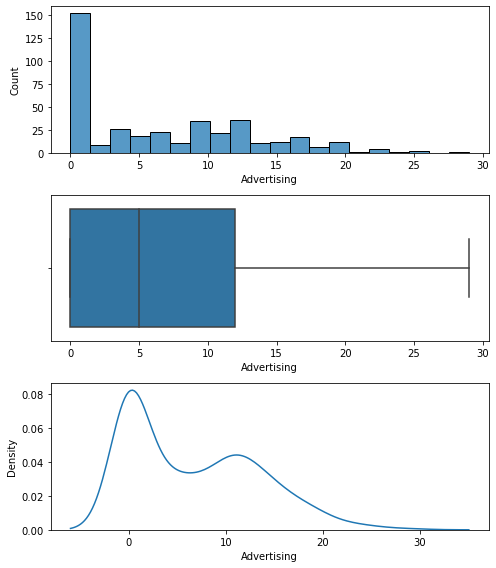

In [33]:
plt.figure(figsize=(7,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins=20)

plt.subplot(3,1,2)
sns.boxplot(data[var])

plt.subplot(3,1,3)
sns.kdeplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 광고비 0인 곳이 25%가 넘음 >>거의 홍보가 되고 있지 않음 >> 실적에 영향이 있을것
* 5천달러, 1만달러 구간이 살짝 수치가 나타남

8) 추가 분석해 볼 사항이 있나요?

* 광고비 0인 지역과 어느정도 투자한 지역(5천,1만달러)과의 비교
    * 판매량, 매출액 비교
* 지역마다 광고비가 어느정도 투입되는지?
* 인구밀접도가 높은 지역에 광고를 많이 했는지?

### ⑤ Population

In [34]:
var = 'Population'

1) 변수의 비즈니스 의미

>지역 인구수(단위: 1000명)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [35]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> X

5) 기초통계량(수치화)

In [37]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


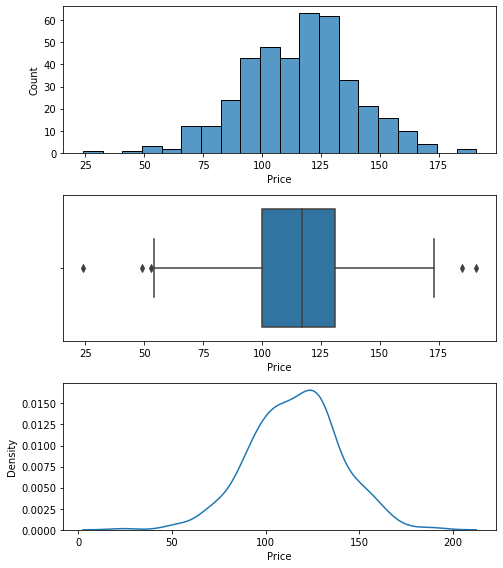

In [44]:
plt.figure(figsize=(7,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins=20)

plt.subplot(3,1,2)
sns.boxplot(data[var])

plt.subplot(3,1,3)
sns.kdeplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 14만~40만명이 전체의 50%차지
* 대체로 비슷하게 분포해있고 275,500부근쯤 수치가 조금 크다

8) 추가 분석해 볼 사항이 있나요?

* 인구수와 판매량의 상관관계
* 인구수 별 연령층 구성을 확인

### ⑥ Price

In [39]:
var='Price'

1) 변수의 비즈니스 의미

>자사 지역별 판매가격

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [40]:
data[var].isna().sum()

0

> NAN 없음

4) 가변수화 필요 여부

> 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [41]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


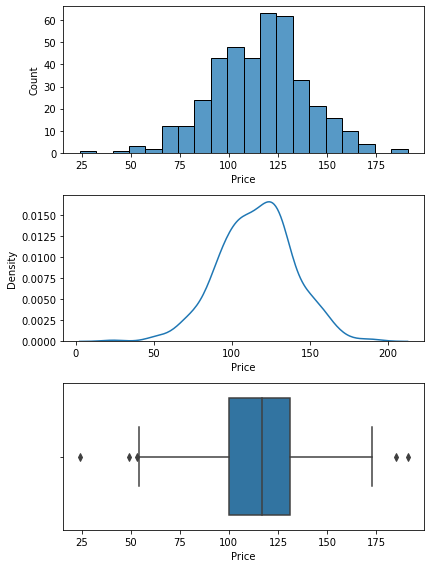

In [42]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전체의 50%가 100~130 사이에 구매를 많이한다
* 그 중 120-130달러가 많이 소비됨
* 60달러 밑의 구매한 상품들은 무엇일까? 재고처리해서 할인을 많이했나? 특별한 이벤트로 할인가에 판매했을까? 아님 정말 싼 카시트인걸까?

8) 추가 분석해 볼 사항이 있나요?

* 경쟁사와 가격 비교
    * 자사는 25-180 분포를 띄고 있고, 경쟁사는 77-175 의 분포를 띄고 있음
    * 자사가 좀더 저렴한 제품까지 판매함

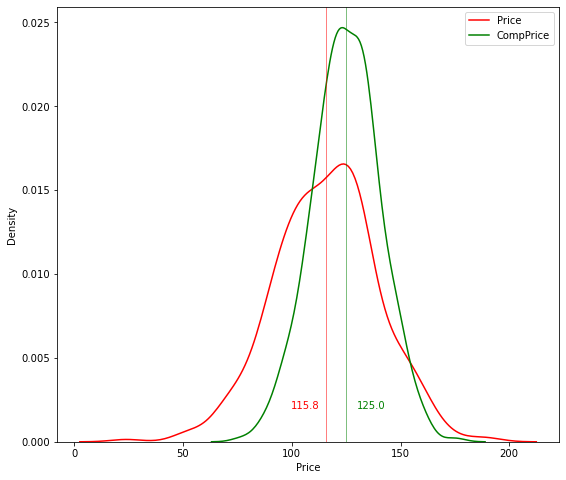

In [62]:
plt.figure(figsize=(9,8))
sns.kdeplot(data['Price'], color='r', label='Price')
sns.kdeplot(data['CompPrice'], color='g', label='CompPrice')

price_mean=round(np.mean(data['Price']),1)
comp_mean=round(np.mean(data['CompPrice']),1)

plt.axvline(price_mean, color='red', linewidth=.5)
plt.axvline(comp_mean, color='green', linewidth=.5)

plt.text(price_mean-16,0.002,price_mean, color='r')
plt.text(comp_mean+5,0.002,comp_mean, color='g')

plt.legend()
plt.show()

> 경쟁사는 가격의 폭이 좁은 대신 특정 구간에서 높은 판매량을 나타낸다
 그에 비해 자사는 가격의 폭이 좀더 넓어서 그런가 특정 구간에서 집중된다기 보다 살짝 
옆으로 퍼진 느낌
>> 비즈니스 관점에서 적당한 가격과 기능 좋은 카시트 하나만 집중적으로만 팔면 전체적인 판매량이 더 늘릴 수 있지 않을까 싶다

### ⑦ ShelveLoc

In [63]:
var='ShelveLoc'

1) 변수의 비즈니스 의미

> 진열상태

2) 숫자, 범주?

> 범주

In [65]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [66]:
data[var].isna().sum()

0

> NA 없음

4) 가변수화 필요 여부

> 범주형이라 가변수화 필요

5) 기초통계량(수치화)

> 범주형 변수는 범주별 빈도수와 비율을 확인

In [67]:
#범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [69]:
#범주별 비율
#data[var].value_counts()/data[var].shape[0]
data[var].value_counts()/len(data[var])

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


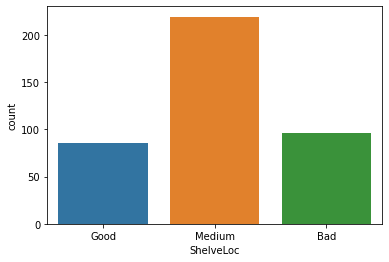

In [75]:
#seaborn
sns.countplot(data[var], order=['Good','Medium','Bad'])
plt.show()

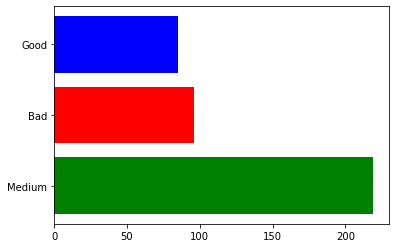

In [77]:
#matplot
cnt = data[var].value_counts()
plt.barh(cnt.index, cnt.values, color=['g','r','b'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열상태 중간이 54%, 상태 나쁜것24%, 좋은것 21% >> 상태 좋고 나쁜것은 별로 차이가 안난다..

8) 추가 분석해 볼 사항이 있나요?

* 진열 상태에 따른 판매량 차이

### ⑧ Age

In [80]:
var='Age'

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [81]:
data[var].isna().sum()

0

> NAN 없음

4) 가변수화 필요 여부

> X

5) 기초통계량(수치화)

In [82]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


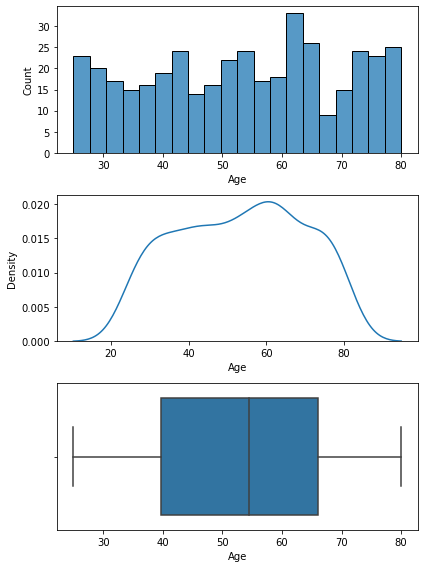

In [88]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 25-80세까지 분포>> 25세 미만의 사람들은 수집을 하지 않은건가?필요가없어서?
* 카시트는 영유아부터 주니어 용(저학년?)까지 사용
  ->20대 후반에서40세의 부모들이 구매할 것 같음.
  
* 분포를 잘 모르겠..다...


8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [90]:
var='Urban'

1) 변수의 비즈니스 의미

> 도심 지역 여부

2) 숫자, 범주?

> 범주

In [91]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [92]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> 범주형이라 가변수화 필요

5) 기초통계량(수치화)

In [94]:
# 범주별 빈도수
data[var].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [95]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Yes    0.705
No     0.295
Name: Urban, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


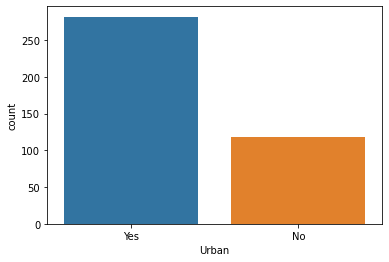

In [96]:
sns.countplot(data[var], order = ['Yes','No'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 도심에 매장 70% 있음

8) 추가 분석해 볼 사항이 있나요?

* 도심에 인구수를 고려해 판매량 비교

### ⑩ US

In [97]:
var='US'

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부

2) 숫자, 범주?

> 범주

In [98]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [99]:
data[var].isna().sum()

0

> NA 없음

4) 가변수화 필요 여부

> 범주형이라 가변수화 필요

5) 기초통계량(수치화)

In [100]:
# 범주별 빈도수
data[var].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [101]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Yes    0.645
No     0.355
Name: US, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


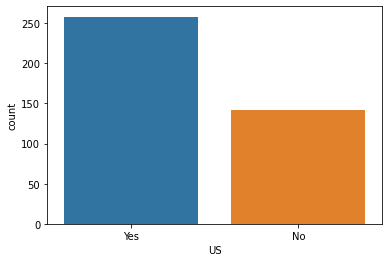

In [102]:
sns.countplot(data[var], order = ['Yes', 'No'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 매장이 미국이 있는 비율 : 64.5%

8) 추가 분석해 볼 사항이 있나요?

* 국내외 판매가격 차이, 광고비 비교